In [1]:
import torch
from torch import nn
#nn has all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt

#checking PyTorch version
torch.__version__

'2.7.0+cpu'

In [2]:
# We'll use linear regression formula using straight with known parameters
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)

Y=weight*X+bias
X[:10],Y[:10],len(X),len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
#creating train/test split
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

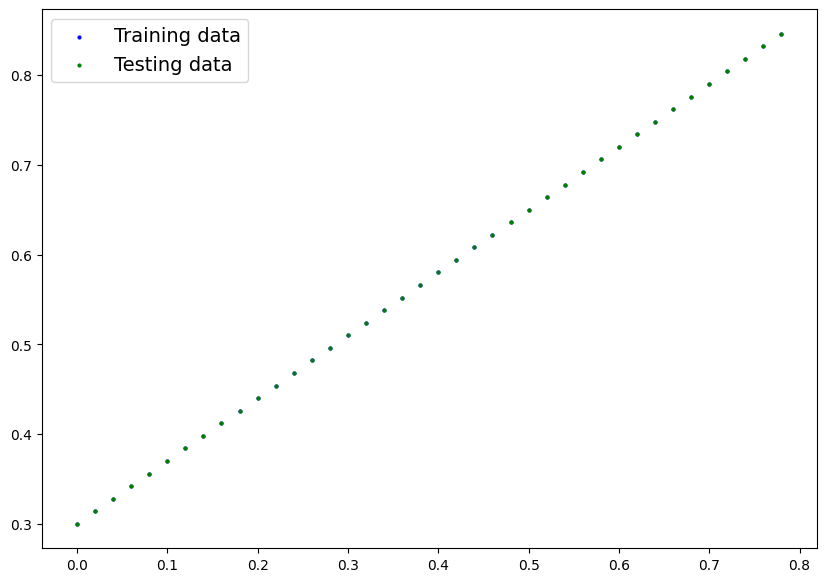

In [29]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions,
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4, label="Training data")
    
    #Plot test data in blue
    plt.scatter(train_data,train_labels,c="g",s=4, label="Testing data")
    
    if predictions is not None:
        #plot predictions if they appear
        plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
    
    #show the legends
    plt.legend(prop={"size":14})
    
plot_predictions()

In [5]:
# Building first pytorch model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        self.bias=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
        #forward method to define the compution in model
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias #this is linear regression

In [6]:
#Creating a random seed
torch.manual_seed(42)

#Creatinga n instance of a modle

model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
#Making predictions
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

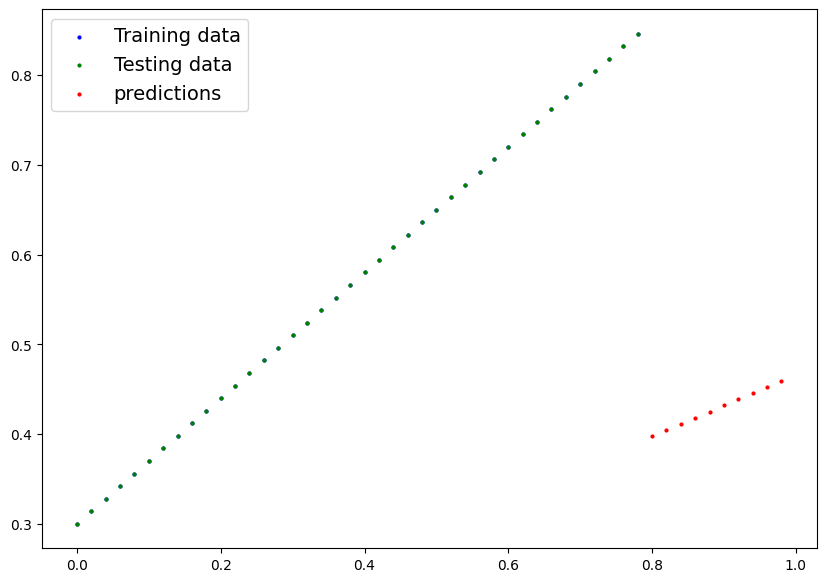

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
#setting up loss function
loss_fn=nn.L1Loss()

#setting up optimizer(we'll use SGD for now)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)#lr is learning rate

In [11]:
# building a training loop and testing loop in PyTorch

#epoch is one loop through data
epochs=200

# track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

# step 0
for epoch in range(epochs):
    #set the model to training mode
    model_0.train()
    
    # 1. forward pass
    y_preds=model_0(X_train)
    
    # 2. calculation loss
    loss=loss_fn(y_preds,Y_train)
    # print(f"loss : {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Performing back propogation
    loss.backward()
    
    # 5. Step the optimiser
    optimizer.step() # tells the optimizer how the changes will accumulate through the loop so we have to zero them in step 3
    
    #testing
    model_0.eval() #turns off different dettings inmodel not needed for evaluation/testing
    with torch.inference_mode(): #Turns off gradient tracking and some more things behind the scene
        # 1. do forward 
        test_preds=model_0(X_test)
        
        # 2. calculate the loss
        test_loss = loss_fn(test_preds,Y_test)
        
        #3. print whats happening
        if(epoch%10==0):
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} |Loss :{loss} | Test loss:{test_loss}")
        
model_0.state_dict()

Epoch: 0 |Loss :0.31288138031959534 | Test loss:0.48106518387794495
Epoch: 10 |Loss :0.1976713240146637 | Test loss:0.3463551998138428
Epoch: 20 |Loss :0.08908725529909134 | Test loss:0.21729660034179688
Epoch: 30 |Loss :0.053148526698350906 | Test loss:0.14464017748832703
Epoch: 40 |Loss :0.04543796554207802 | Test loss:0.11360953003168106
Epoch: 50 |Loss :0.04167863354086876 | Test loss:0.09919948130846024
Epoch: 60 |Loss :0.03818932920694351 | Test loss:0.08886633068323135
Epoch: 70 |Loss :0.03476089984178543 | Test loss:0.0805937647819519
Epoch: 80 |Loss :0.03132382780313492 | Test loss:0.07232122868299484
Epoch: 90 |Loss :0.02788739837706089 | Test loss:0.06473556160926819
Epoch: 100 |Loss :0.024458957836031914 | Test loss:0.05646304413676262
Epoch: 110 |Loss :0.021020207554101944 | Test loss:0.04819049686193466
Epoch: 120 |Loss :0.01758546568453312 | Test loss:0.04060482233762741
Epoch: 130 |Loss :0.014155393466353416 | Test loss:0.03233227878808975
Epoch: 140 |Loss :0.0107165891

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

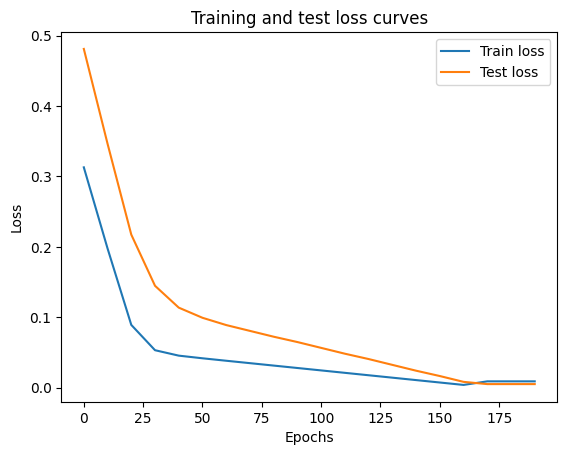

In [12]:
# ploting loss curver
import numpy as np

plt.plot(epoch_count,torch.tensor(loss_values).cpu().numpy(), label="Train loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [13]:
with torch.inference_mode():
    y_pred_new=model_0(X_test)

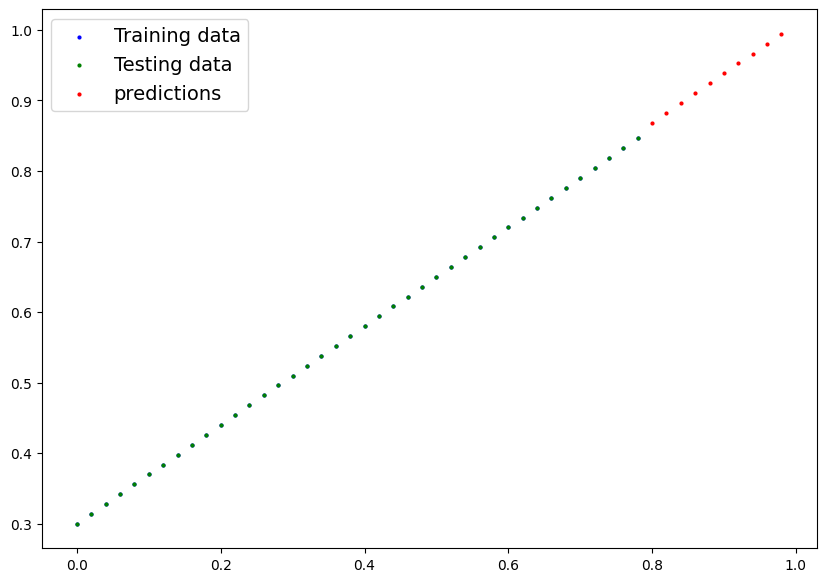

In [14]:
plot_predictions(predictions=y_pred_new)

In [16]:
#Saving and loading PyTorch Model

from pathlib import Path
#1. create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="PytorchWorkFolowModel0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH


#3 save model's state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to models\PytorchWorkFolowModel0.pth


In [17]:
!ls -l models/

total 4
-rw-r--r-- 1 akhil 197609 2077 Jun 13 16:52 PytorchWorkFolowModel0.pth


In [21]:
#loading the saved state_dict we have to instiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()


#load the state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
#making some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)
    
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
#comparing  predictions form old model to newely saved model.
y_preds== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])